## Logistic Regression
binary classification: y data label이 0 혹은 1의 2개.

In [1]:
# logistic model의 의미
# Logistic Regression을 그림으로 알아보자.
# 결국, Titanic 예제 같은 것을 하는 목적은, 가설을 얻어내는 것.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import warnings
from sklearn.linear_model import LogisticRegression
import mglearn
# warnings 내부 모듈 : 경고메시지 뜨지 않게 하려고
# scikitlearn에서 linear model 활용
# mglearn : 처음 쓰는 모듈 -> 설치 안 되어 있음 -> module not found error -> anaconda prompt -> activate cpu env -> pip install mglearn

warnings.filterwarnings(action="ignore")
# warning 내부모듈에서 warning 메시지 무시하도록.
# warning 출력 배제.

C:\Users\student\Anaconda3\envs\cpu_env\lib\site-packages\tensorflow\python\framework\dtypes.py:493: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\student\Anaconda3\envs\cpu_env\lib\site-packages\tensorflow\python\framework\dtypes.py:494: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\student\Anaconda3\envs\cpu_env\lib\site-packages\tensorflow\python\framework\dtypes.py:495: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\student\Anaconda3\envs\cpu_env\lib\site-packages\ten

cost 값은 : 3.5901057720184326
cost 값은 : 0.28111472725868225
cost 값은 : 0.2499435693025589
cost 값은 : 0.2418675422668457
cost 값은 : 0.23877932131290436
cost 값은 : 0.23727622628211975
cost 값은 : 0.23637381196022034
cost 값은 : 0.23572272062301636
cost 값은 : 0.23518382012844086
cost 값은 : 0.2346976399421692
[1]


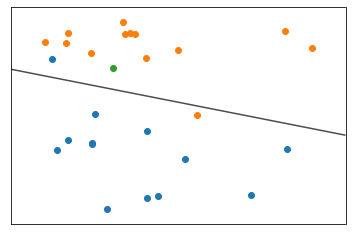

In [2]:
# mglearn의 기본 data set을 이용해 그림을 그린다.
# mglearn의 dataset 중 make_forge라는 data set

# 1. data load
x, y = mglearn.datasets.make_forge()

# 2. data 확인

x   # x data는 2차원 numpy array
y   # y data는 0, 1, 0, 1, ...

# 데이터를 살펴본 결과, 입력 파라미터가 2개이고(2차원), label이 0 혹은 1로 떨어지는 logistic model.

# 문제를 단순화시켜서 x축 data만 그림으로 살펴보자.

# y label에 대해 각각의 x가 어떻게 분포되어 있는지를 확인하기 위함.

# 산점도(scatter) 그리기.
# y값이 0인 x를 추출해서, x의 첫 번째 column을 x축으로, x의 두 번째 column을 y축으로 그린다. -> column 간 관계 파악.
# label이 각각 0과 1인 x 데이터만 출력 : 2번째 행, 4번째 행, 5번째 행, ...
# boolean mask 사용
y == 0   # broadcasting되어서 boolean mask 결과로 나옴. -> x 행에 집어넣으면, True에 해당하는 data만 추출.
blue = x[y==0]  # 파란색 점 찍히는 애들
plt.scatter(blue[:,0], blue[:,1])
# blue[:,0] -> 모든 행에 대해서 첫 번째 열
orange = x[y==1]   # 주황색 점 찍히는 애들
plt.scatter(orange[:,0], orange[:,1])

# 파란 점들: y가 0일 때, x축 data가 어떻게 분포되어 있나.
# 주황 점들: y가 1일 때, x축 data가 어떻게 분포되어 있나.

# 3. machine learning(Logistic Regression)
# 데이터 넣어서 학습 -> 테스트 통해 정확도 측정 -> 예측.

# 원래는 train data set, test data set 나눠서 accuracy 측정해야 하는데, 지금은 생략.

# 3-1. 학습 : train data set

# 1) train data set
# x는 그냥 넣어도 되지만, y는 1차원이라서 그냥 넣으면 안 된다.
train_x_data = x
train_y_data = y.reshape([-1,1])

# 2) placeholder
X = tf.placeholder(shape = [None, 2], dtype = tf.float32)
Y = tf.placeholder(shape = [None, 1], dtype = tf.float32)

# 3) weight, bias
# 초기 값으로 random 값을 주고, 학습을 통해 최적화되며 W와 b가 변해 간다.
# 원래는 랜덤 값 외에 다른 것도 줄 수 있지만.
W = tf.Variable(tf.random_normal([2, 1]), name = "weight")
b = tf.Variable(tf.random_normal([1]), name = "bias")

# 4) H, 가설 설정 -> 머신러닝의 목적: 가설 완성.
logit = tf.matmul(X, W) + b
H = tf.sigmoid(logit)

# 5) cost function
# tf.nn.sigmoid_cross_entropy_with_logits : 인자 2개로, 첫 번째 인자(logits)로 logit, 두 번째 인자(labels)로 Y. 
cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits = logit,
                                                             labels = Y))

# 6) train node, optimizer
# optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.01)
# train = optimizer.minimize(cost)
# 한 줄로 표현하기
train = tf.train.GradientDescentOptimizer(learning_rate = 0.01).minimize(cost)

# 7) session, 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# 8) 학습 진행
for step in range(3000):
    _, cost_val = sess.run([train, cost], feed_dict = {X : train_x_data,
                                                      Y: train_y_data})
    if step % 300 == 0:
        print("cost 값은 : {}".format(cost_val))

# 3-2. 정확도(accuracy) 측정 : test data set
# 원래는 test data set을 가지고 정확도 측정해야 함.
# 학습의 결과가 만족스러운지 확인하기 위함.
# 지금 단계에서는 생략. 그냥 학습만 진행.
# 정확도 측정에서 95% 이상 나오면 사용할 만한 모델. : 업무/실생활에서 적용할 수 있음.

# 3-3. 예측(prediction)

# H를 실행해서 예측하는 게 목적.
result = sess.run(H, feed_dict = {X : [[9,4]]})
result
# X에 아무 거나 넣어서 예측.
# X는 placeholder 형태이므로 shape 맞춰서 넣어야 함.
# result 찍어보니까 0.8 정도 나옴 : 1에 가까움.

# 그래프로 그려 보면, 1에 가깝게 나온다.
plt.scatter(9,4)

# 4. sklearn 활용

# 4-1. 학습
# 한 번에 학습이 끝남.
model = LogisticRegression()
myModel = model.fit(x,y) # logistic model 학습

# 4-2. 예측
# data를 넣어줘야 예측이 가능하니까, x쪽에 데이터 넣어준다.
print(myModel.predict([[9,4]]))
# 결과값이 1이 나옴.
# 이전의 모델에서는 0.8 정도 떨어져서, 0.5보다 크니까 1로 간주한다고 이해했지만,
# sklearn에서 model 이용해서 바로 학습 진행하고 예측하면, 1이라는 결과값 도출.

# 4-3. mglearn 이용해 그래프 그리기.
# mglearn, plots의 plot_2d_separator 활용해 내가 만든 모델을 그림으로 표현할 수 있음.
# tensorflow로 만든 모델은 아니지만, sklearn으로 만든 모델이어도 그림으로 그린다.
mglearn.plots.plot_2d_separator(myModel, x, fill = False, eps = 0.5, alpha = 0.7)
# 중요한 인자 : myModel, x
# myModel의 x data 이용해 그림을 그릴 것이다.
# alpha : 투명도(1일수록 진함)
# eps : 그래프가 크게 보이는데, 그 scale을 축소해서 보기 좋게 하려고.
# x : x data 이용한다.

# 그림 그려보니까, 선이 그려진다.
# 결국 logistic model을 만든다는 것은, 저 선을 그린다는 것.
# 내가 알고 싶은 데이터가 선을 기준으로 무슨 영역에 위치하는지 알아내는 것.

# linear model은 주어진 데이터를 가장 잘 표현하는 직선을 만드는 것.
# logistic은 0과 1을 구분하는 가장 적절한 선을 구하는 것.
# 두 개의 분류를 가로지르는 적절한 선을 가로지르는 것.
# 결국 logistic model을 만드는 것은 저 선이 무엇인지, 어디에 있는지 알아낸다.
# 내가 알고 싶은 데이터가 어느 영역에 있는지 표현.

# 만약 x축 데이터가 3개라면, 3차원 공간의 그래프가 될 것이고, logistic model은 평면이 된다.

# hyperplan이라고 불리는 선/면/공간을 구하는 model이 logistic model.
# 군집(0, 1)이 있는데, 그걸 가로지르는 hyperplane(경계)이 어디인지 알아내는 것.

# 그렇다고 저 선이 0.5를 나타내는 것은 아님.
# 0.5라는 값은 임의적으로 잡은 값 : 둘 중에 하나로 선택해야 하니까 50%를 기준으로.
# 0.8이라는 값은, 선을 기준으로 위쪽 영역에 얼마나 가까운지를 수치로 나타낸 값.

# 그런데, 그림을 그려보니까 파란색, 주황색이 완전하게 구분되지 않는다.
# 과적합의 문제가 있어서 실제로 안 좋은 결과값을 도출할 수 있다.
# 손필기!
# 약간의 오류가 있어 보이는 것 같지만, 실제 data 예측에서는 훨씬 더 좋은 hyperplane.
# overfitting 피하는 방법: 딥러닝에서!


# tensorflow 가지고 예측을 하거나, logistic으로 만든 model을 가지고 예측을 하거나, 
# 결국 [[9,4]]가 어느 쪽에 있는지를 보고 그게 해당 선을 기준으로 어디에 있는지 판단한다.

In [3]:
# logistic model을 multinomial로 확장.
# tensorflow 등 머신러닝에서 많이 쓰이는 사례

# Multinomial classification
# y data label이 여러 개.

# hyperplane이 여러 개
# 각 영역에 대해 가까울 확률이 얼마인지
# 그래프가 바뀌기 때문에 가설도 바뀌고, 모델도 바뀌고

In [4]:
# X data는 시험 성적과 출석 점수, Y data는 학점(0, 1이 아니라 다양함).
# Y label이 2개 초과의, 정해져 있는 범주에서 나온다.

# 시험점수 출석점수 성적
#   10       5       A
#   9        5       A
#   5        1       B
#   4        2       B
#   1        3       C


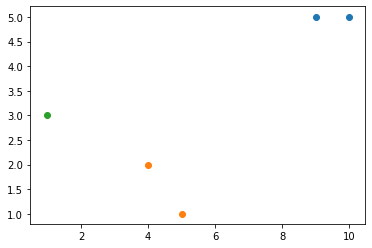

In [5]:
# 입력으로 들어갈 X data : 시험점수, 출석점수 -> numpy array로 표현.

x_data = np.array([[10,5],
                  [9,5],
                  [5,1],
                  [4,2],
                  [1,3]])
# 2차원 numpy array

y_data = np.array([["A"],
                  ["A"],
                  ["B"],
                  ["B"],
                  ["C"]])
# y label이 문자열이므로 학습이 되지 않음.

# 자료 구조 확인

# data를 따로 확인해 보자.
# scatter 그리기
plt.scatter(x_data[0:2,0], x_data[0:2, 1]) # A학점 받은 x data 구조(시험점수, 출석점수)
plt.scatter(x_data[2:4,0], x_data[2:4, 1]) # B학점 받은 y data 구조(시험점수, 출석점수)
plt.scatter(x_data[4,0], x_data[4, 1])

# x_data의 0, 1행에 대해서 0열이므로 10, 9 + x_data의 0, 1행에 대해서 1열이므로 5, 5

### 예시
3번의 퀴즈, 출석 점수를 통해 성적을 예측.

           x data                   label          one-hot encoding
퀴즈1    퀴즈2   퀴즈3    출석      성적       A      B     C
10         7       8        5        A         1
8          8       9        4        A         1
7          8       2        3        B                1
6          3       9        3        B                1
7          5       7        4        B                1
3          5       6        2        C                      1
2          6       3        1        C                      1

In [6]:
import tensorflow as tf
# 학습(train) -> 정확도(test) -> 예측(prediction) : 정확도 생략.

# 1. 학습

# 1-1. training data set : numpy array

# x data : 세 번의 퀴즈와 출석
train_x_data = [[10,7,8,5],
                [8,8,9,4],
                [7,8,2,3],
                [6,3,9,3],
                [7,5,7,4],
                [3,5,6,2],
                [2,4,3,1]]

# y data : y쪽 label -> one-hot encoding
train_y_data = [[1,0,0],
                [1,0,0],
                [0,1,0],
                [0,1,0],
                [0,1,0],
                [0,0,1],
                [0,0,1]]
print(train_y_data)

# 1-2. placeholder
# Y가 one- hot encoding으로 변하니까, shape에 주의.
X = tf.placeholder(shape = [None, 4], dtype = tf.float32)
Y = tf.placeholder(shape = [None, 3], dtype = tf.float32)

# 1-3. W, bias
# weight 행렬의 크기에 주의 : X, Y 보고 빠르게 구할 수 있음.
# logistic 3개 모였으니까(A, B, C) bias 1차원으로 3개
# bias : 분류의 개수
W = tf.Variable(tf.random_normal([4,3]), name = "weight")
b = tf.Variable(tf.random_normal([3]), name = "bias")

# 1-4. hypothesis
# logit은 동일하게 행렬곱
# 가설 함수에서 sigmoid하면 각각의 가설에 대해 확률이 나온다. sigmoid 안 된다.
# 전체 확률값의 합이 1이 되게 구하기 위해 softmax.
# softmax : tensorflow가 제공하는, 확률값을 구해주기 위한 함수.
logit = tf.matmul(X, W) + b
H = tf.nn.softmax(logit)

# 1-5. cost function
# multinomial에서는 hypothesis가 바뀌니까 cost함수도 따라서 바뀌어야 함.
# tensorflow 라이브러리가 제공해준다.
# softmax cross entropy version2를 사용해야 한다! 인자는 binomial과 동일함
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits = logit,
                                                                 labels = Y))

# 1-6. train
# 동일 : gradient descent 사용, learning rate도 그대로 사용.
train = tf.train.GradientDescentOptimizer(learning_rate = 0.1).minimize(cost)

# 1-6. 실행할 준비 : session, 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# 1-7. 학습
# learning_rate 0.1 줬을 때 cost값이 제일 작아지는데?
for step in range(3000):
    _, cost_val = sess.run([train, cost], feed_dict = { X : train_x_data,
                                                      Y : train_y_data})
    if step % 300 == 0:
        print("cost 값은 : {}".format(cost_val))

# 학습 끝
# 데이터 크기 매우 작기 때문에, minmax scaler 등 작업 거치지 않아도 raw data로 학습 가능.

# 2. 정확도 측정

# 로지스틱에서의 정확도 측정
# predict = tf.cast(H>0.5, dtype = tf.float32)
# 결과로 나오는 H가 true일 확률로 나오기 때문에, 0.5를 기준으로 boolean을 추출하고 실수로 casting할 수 있었음.

# MULTINOMIAL의 정확도 측정
# x 데이터만주면 됨. 
sess.run(H, feed_dict = { X : [[10,8,9,5]]})
# 값이 3개 나옴. 10의  -1승으로 a일 확률이 제일 크게 나옴.

# 예측해서 나온 A라는 학점이 y측 label과 같은지 봐야 함. 그걸 가지고 정확도 측정.
predict = tf.argmax(H, axis = 1)  # 가장 큰 값의 index 번호 return
# argmax : 특정 방향으로 가장 큰 값의 index 번호 return
# axis = 0 : 세로(행) 방향, axis = 1 : 가로(열) 방향

correct = tf.equal(predict, tf.argmax(Y, axis = 1))
# 비교할 것인데, 입력한 정보(Y측 label)에서 가로 방향으로 가장 큰 값이 몇 번째에 있는지 index 번호 찾아서
# 몇 번째에 있는지 비교. -> tensorflow의 equal을 기준으로.
# logistic은 0.5를 기준으로 크냐작냐를기준으로 비교 했는데 여기서는 다르다.

accuracy = tf.reduce_mean(tf.cast(correct,dtype = tf.float32))
# correct를 cast하고 

# test data 밀어넣어 주면서 accuracy 측정
print("정확도 : {}".format(sess.run(accuracy,
                                feed_dict = {X: train_x_data,
                                            Y: train_y_data})))
# 예측 정확도와 별개로, 위와 같이 학습한 데이터를 가지고 테스트한다면 정확도 거의 1에 가깝게 나옴,
# 특정 데이터를 가지고 학습했는데, 그 학습 데이터를 그대로 테스트하는 상황.


[[1, 0, 0], [1, 0, 0], [0, 1, 0], [0, 1, 0], [0, 1, 0], [0, 0, 1], [0, 0, 1]]
cost 값은 : 11.230758666992188
cost 값은 : 1.1732550859451294
cost 값은 : 0.9902771711349487
cost 값은 : 0.6860259175300598
cost 값은 : 0.5618454813957214
cost 값은 : 0.5118224024772644
cost 값은 : 0.47368839383125305
cost 값은 : 0.05306902900338173
cost 값은 : 0.047983258962631226
cost 값은 : 0.04433310404419899
정확도 : 1.0


### BMI 예제
1. 혼자 푼 파일
2. 정답 확인

In [7]:
# 예제 : BMI 측정
# BMI 데이터를 학습한 후 자신의 키와 몸무게를 넣어서 상태 확인.
# 실측 데이터 : 표준 미만, 표준, 표준 초과의 3개 label
# bmi.csv 찾아서 multinmial 문제 학습!

# one hot encoding, minmax scaler

In [8]:
# BMI 예제 정답

In [9]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
from sklearn.preprocessing import MinMaxScaler

warnings.filterwarnings(action = "ignore")

{'whiskers': [<matplotlib.lines.Line2D at 0x25b5e6db518>,
 'caps': [<matplotlib.lines.Line2D at 0x25b5e6dbba8>,
 'boxes': [<matplotlib.lines.Line2D at 0x25b5e6bbb70>],
 'medians': [<matplotlib.lines.Line2D at 0x25b5e6e5278>],
 'fliers': [<matplotlib.lines.Line2D at 0x25b5e6e55c0>],
 'means': []}

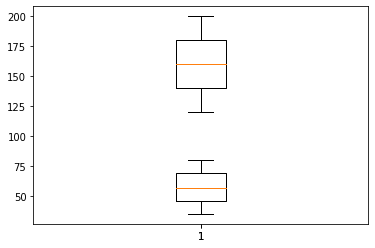

In [10]:
# 0. Data 준비 및 확인
data_df = pd.read_csv("./data/bmi.csv", skiprows = 3)

# 결측치 확인 : 없음.
data_df.isnull().sum()

# 이상치 확인
plt.boxplot(data_df["height"]) # 이상치 없음
plt.boxplot(data_df["weight"]) # 이상치 없음

In [11]:
# 1. data 준비

# train, test data 나눌 기준 행 넘버
split_num = int(data_df.shape[0] * 0.8)

# x_data, y_data 준비
# 행 들고 오고, 열은 뒤에 한 번에 fancy indexing 줘도 된다.
# 들고올 때 한 번에 정규화하자.
train_x_data = data_df.loc[:split_num, ["height", "weight"]]

scaler = MinMaxScaler()
# scaler 하나의 변수로 저장해 놓기
MinMaxScaler().data_max_

AttributeError: 'MinMaxScaler' object has no attribute 'data_max_'

In [12]:
# 1. data 준비

# train, test data 나눌 기준 행 넘버
split_num = int(data_df.shape[0] * 0.8)

# scaler 변수로 저장
scaler = MinMaxScaler()

# 1-1. x_data
# 1) 행 들고 오고, 열은 뒤에 한 번에 fancy indexing 줘도 된다.
# 2) 들고 올 때 한 번에 정규화한다.
x_data = scaler.fit_transform(data_df.loc[:split_num, ["height", "weight"]])
## MinMaxScaler().fit_transform 이라는 함수
## fit_transform 두 가지 역할 동시에 한다.
## fit : minmax 할 data 들고와
## transform : 변환해

# 3) train, test용으로 나누기
train_x_data = x_data[:split_num]
print(train_x_data.shape)
# x_data가 주체임 : min max scaler, fit transform 통과해서 들고온다 -> 정규화되면서 numpy array가 된다
# -> numpy array에서는 뒤에가 exclusive
test_x_data = x_data[split_num:]

# 1-2. y_data  생성 

# one_hot encoding 필요
# - pandas.get_dummies()
# - tensorflow.one_hot()

sess = tf.Session()

# 주의할 것 : 데이터의 개수
sess.run(tf.one_hot(data_df.loc[:split_num, "label"], 3)).shape
# data_df.loc[:split_num, "label"] : label column만 split_num까지 행을 들고 온다.
# tf.one_hot의 인자 : 분할할 데이터(data_df.loc[:split_num, "label"]), 그것을 몇 개로 분할할 것인지(3)
# sess.run(tf.one_hot(data_df.loc[:split_num, "label"], 3)) : 16001개
# data_df : pandas의 dataframe -> numpy가 아님 -> data frame에서 loc 사용해서 행 가져오면 뒤에 inclusive
# 따라서 one_hot 사용하려면 -1 해줘야 데이터의 개수가 일치한다

train_y_data = sess.run(tf.one_hot(data_df.loc[:split_num-1, "label"], 3))
print(train_y_data)
print(train_y_data.shape)
# -1 : 데이터 개수 일치시키기 위해
test_y_data = sess.run(tf.one_hot(data_df.loc[split_num:, "label"], 3))
print(test_y_data.shape)
# test 에서는 split이 앞에 있으니까 inclusive이므로 -1 없음.

(16000, 2)
[[0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 ...
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]]
(16000, 3)
(4000, 3)


In [13]:
# 2. 학습

# 2-1. 데이터 셋 준비
train_x_data
train_y_data

# 2-2. placeholder
X = tf.placeholder(shape = [None, 2], dtype = tf.float32)
Y = tf.placeholder(shape = [None, 3], dtype = tf.float32)

# 2-3. weight, bias
W = tf.Variable(tf.random_normal([2,3]), name = "weight")
b = tf.Variable(tf.random_normal([3]), name = "bias")

# 2-4. hypothesis
logit = tf.matmul(X,W)+b
H = tf.nn.softmax(logit)

# 2-5. cost
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits = logit,
                                                                labels = Y))

# 2-6. train
train = tf.train.GradientDescentOptimizer(learning_rate = 0.1).minimize(cost)

# 2-7. 준비: session, 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# 2-8. 학습
for step in range(30000):
    _, cost_val = sess.run([train, cost], feed_dict = { X : train_x_data,
                                                        Y : train_y_data})
    if step % 3000 == 0:
        print("cost 값은 : {}".format(cost_val))

cost 값은 : 1.448047161102295
cost 값은 : 0.3605087101459503
cost 값은 : 0.28349339962005615
cost 값은 : 0.24528183043003082
cost 값은 : 0.2211015522480011
cost 값은 : 0.2039448618888855
cost 값은 : 0.1909186989068985
cost 값은 : 0.18057306110858917
cost 값은 : 0.17208760976791382
cost 값은 : 0.16495674848556519


In [14]:
# 3. 정확도 : 잘못됐다.
predict = tf.argmax(H, axis = 1) 
correct = tf.equal(predict, tf.argmax(Y, axis = 1))
accuracy = tf.reduce_mean(tf.cast(correct, dtype = tf.float32))
print("정확도 : {}".format(sess.run(accuracy,
                                feed_dict = {X: test_x_data,
                                            Y: test_y_data})))

정확도 : 0.30149999260902405


In [ ]:
# 4. prediction
prediction_data = scaler.transform([[180, 60]])
prediction_data
# sess.run(H, feed_dict = {X: prediction_data}) : 이렇게 나오면 너무 보기 안 좋으니...
sess.run(tf.argmax(H,1), feed_dict = {X: prediction_data})